#**Heart Disease Analysis in R**

# **Loading Libraries**

In [ ]:
print(installed.packages())

              Package         LibPath                         Version  
IRdisplay     "IRdisplay"     "/usr/local/lib/R/site-library" "1.1"    
IRkernel      "IRkernel"      "/usr/local/lib/R/site-library" "1.3"    
pbdZMQ        "pbdZMQ"        "/usr/local/lib/R/site-library" "0.3-7"  
repr          "repr"          "/usr/local/lib/R/site-library" "1.1.4"  
askpass       "askpass"       "/usr/lib/R/site-library"       "1.1"    
assertthat    "assertthat"    "/usr/lib/R/site-library"       "0.2.1"  
backports     "backports"     "/usr/lib/R/site-library"       "1.4.1"  
base64enc     "base64enc"     "/usr/lib/R/site-library"       "0.1-3"  
bit           "bit"           "/usr/lib/R/site-library"       "4.0.4"  
bit64         "bit64"         "/usr/lib/R/site-library"       "4.0.5"  
blob          "blob"          "/usr/lib/R/site-library"       "1.2.3"  
brew          "brew"          "/usr/lib/R/site-library"       "1.0-7"  
brio          "brio"          "/usr/lib/R/site-library"       "1

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data <- read.csv('/content/sample_data/heart.csv' , header = T )
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
2,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
3,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
5,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


In [ ]:
tail(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
298,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
299,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
300,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
302,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
303,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
glimpse(data)

Rows: 303
Columns: 14
$ age      <int> 63, 37, 41, 56, 57, 57, 56, 44, 52, 57, 54, 48, 49, 64, 58, 5…
$ sex      <int> 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1…
$ cp       <int> 3, 2, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 3, 3, 2, 2, 3, 0, 3, 0…
$ trestbps <int> 145, 130, 130, 120, 120, 140, 140, 120, 172, 150, 140, 130, 1…
$ chol     <int> 233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 2…
$ fbs      <int> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <int> 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1…
$ thalach  <int> 150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 1…
$ exang    <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0…
$ oldpeak  <dbl> 2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, 1.6, 1.2, 0.2, 0…
$ slope    <int> 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1…
$ ca       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0…
$ thal     <int> 1

In [ ]:
ncol(data)

[1] 14

In [ ]:
nrow(data)

[1] 303

In [ ]:
colnames(data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [ ]:
summary(data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :1.000   Median :130.0  
 Mean   :54.37   Mean   :0.6832   Mean   :0.967   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :240.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.3   Mean   :0.1485   Mean   :0.5281   Mean   :149.6  
 3rd Qu.:274.5   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

# Data Transformation

In [ ]:
data2 <- data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

# Data Visualisation

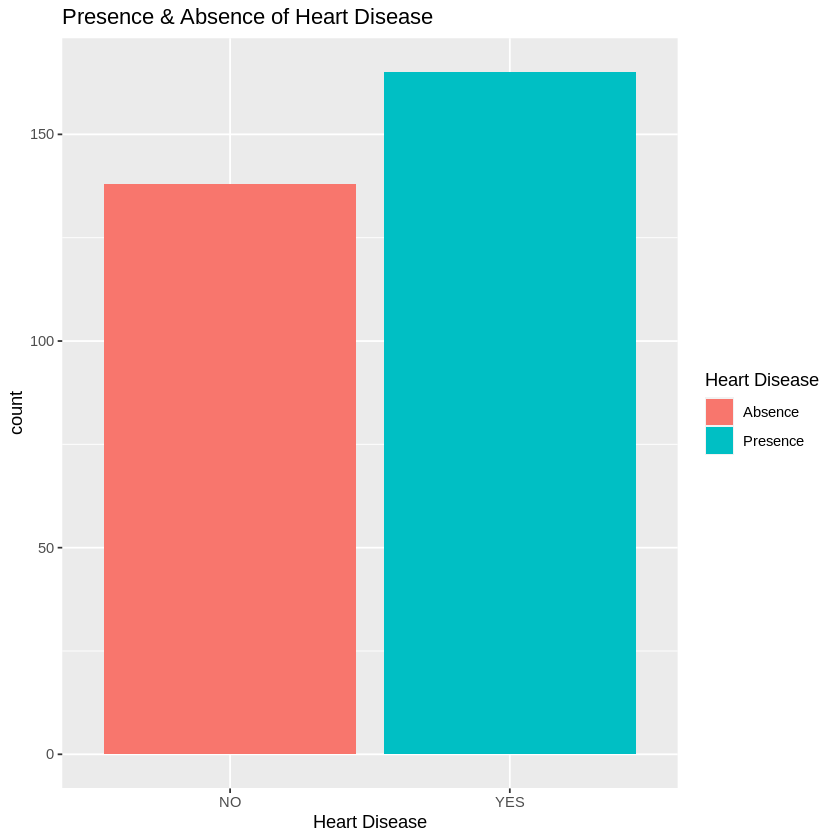

In [ ]:
# Bar Plot for target (heart disease)

ggplot(data2, aes(x=target, fill=target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence"))

In [ ]:
prop.table(table(data2$target))


       NO       YES 
0.4554455 0.5445545 

## Age Analysis

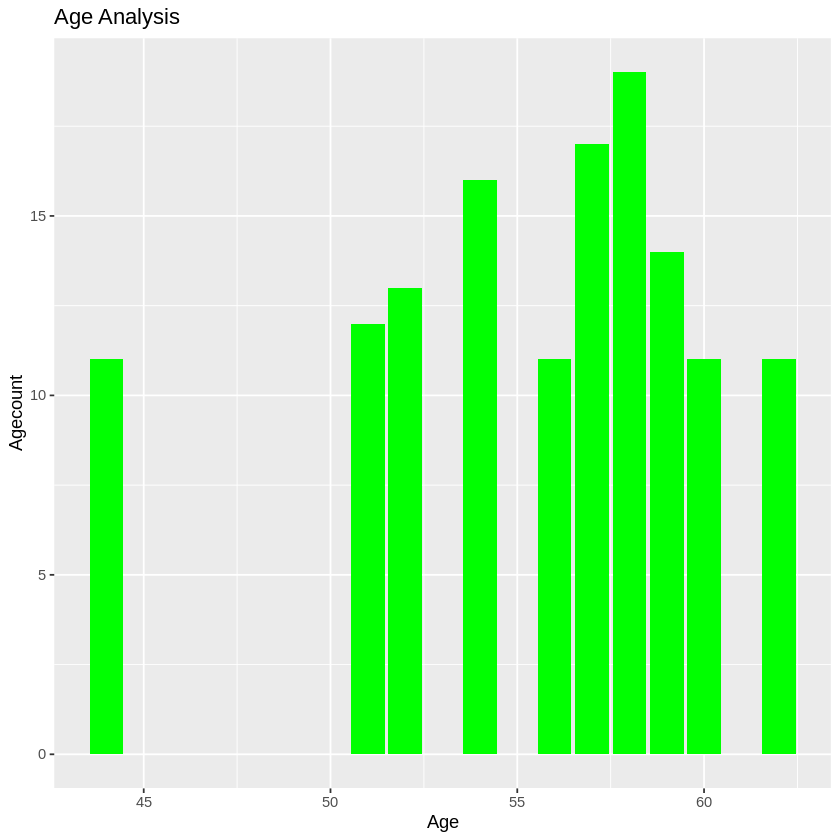

In [ ]:
# count the frequency of the values of age

data2 %>%
  group_by(age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(age, n), fill = 'green')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount")

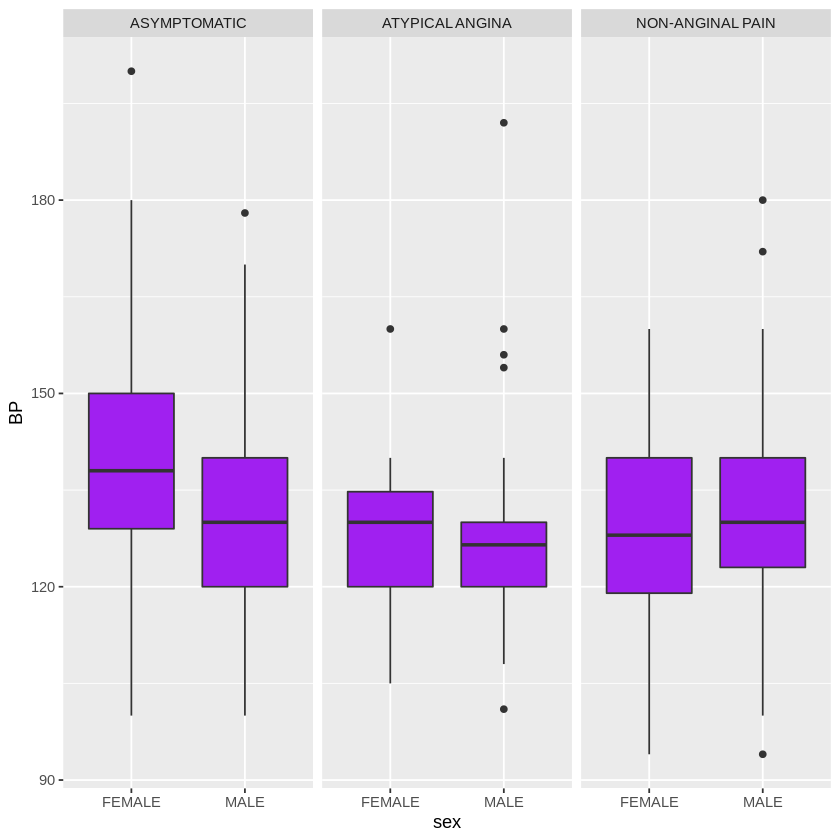

In [ ]:
# comapre blood pressure across the chest pain

data2 %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


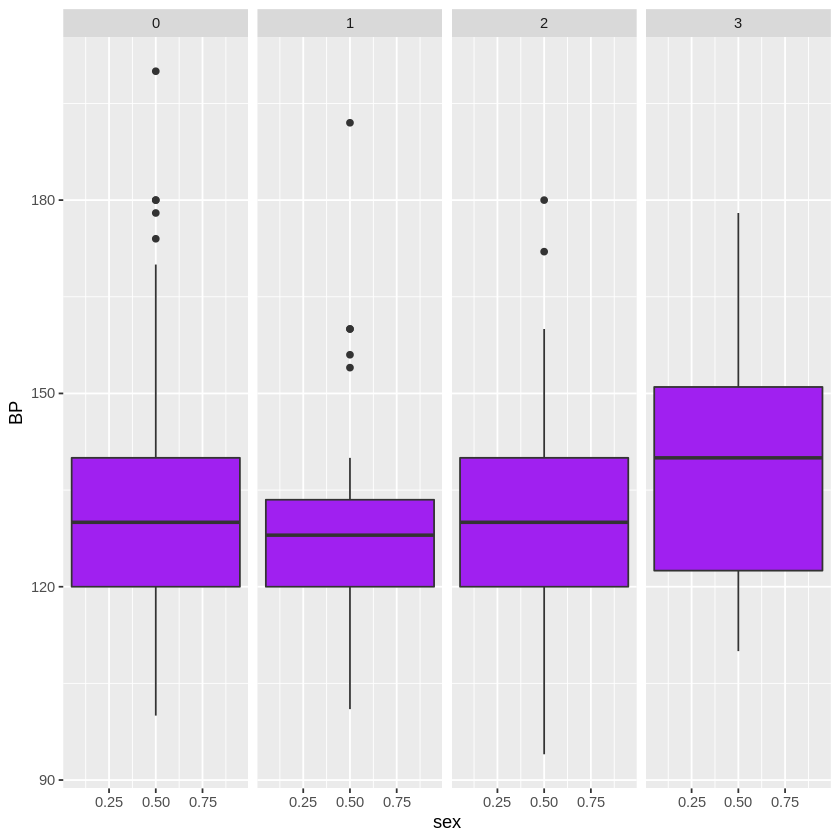

In [ ]:
data %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

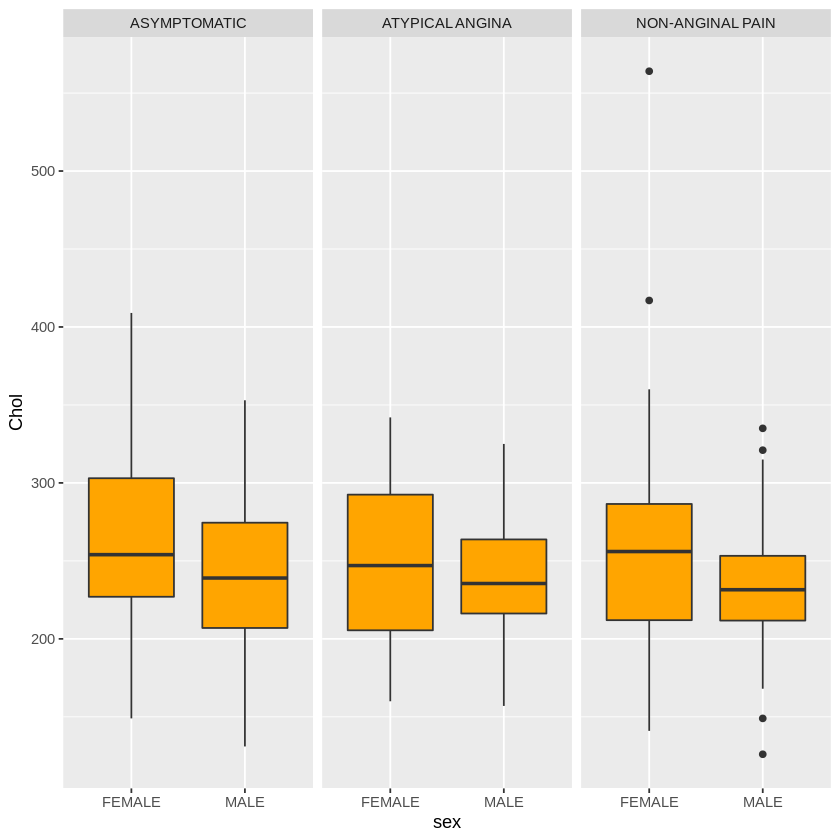

In [ ]:
data2 %>%
  ggplot(aes(x=sex, y=chol))+
  geom_boxplot(fill ='orange')+
  xlab('sex')+
  ylab('Chol')+
  facet_grid(~cp)

# **Correlation**

In [ ]:
install.packages("corrplot")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)
library(ggplot2)

corrplot 0.92 loaded



,age,trestbps,chol,thalach,oldpeak
age,1.0000000,0.27935091,0.213677957,-0.398521938,0.21001257
trestbps,0.2793509,1.00000000,0.123174207,-0.046697728,0.19321647
chol,0.2136780,0.12317421,1.000000000,-0.009939839,0.05395192
thalach,-0.3985219,-0.04669773,-0.009939839,1.000000000,-0.34418695
oldpeak,0.2100126,0.19321647,0.053951920,-0.344186948,1.00000000


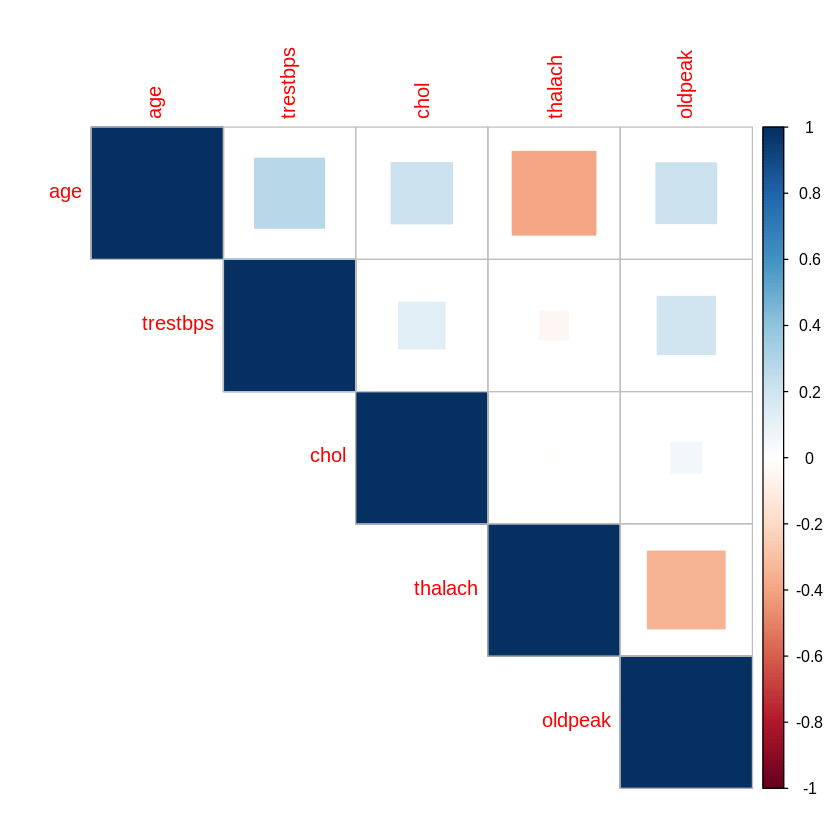

In [ ]:
cor_heart <- cor(data2[, 10:14])
cor_heart

corrplot(cor_heart, method ='square', type='upper')

In [ ]:
??method

# **Check for the null values**

In [ ]:
s = sum(is.na(data2))

In [ ]:
s

[1] 0

In [ ]:
is.null(data2) #another way

[1] FALSE

# **Training and Testing the data**

In [ ]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lava’, ‘prodlim’, ‘ipred’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
set.seed(10)

In [ ]:
colnames(data2)

[1] "target"   "sex"      "fbs"      "exang"    "cp"       "restecg" 
 [7] "slope"    "ca"       "thal"     "age"      "trestbps" "chol"    
[13] "thalach"  "oldpeak"

**Split the data set in 70:30**

In [ ]:
inTrainRows <- createDataPartition(data2$target,p=0.7,list=FALSE)
trainData <- data2[inTrainRows,]
testData <-  data2[-inTrainRows,]
nrow(trainData)/(nrow(testData)+nrow(trainData)) #check the percentage

[1] 0.7029703

**Create 2 list**

In [ ]:
AUC = list()
Accuracy = list()

**Logistic Regression**

In [ ]:
set.seed(10)
logRegModel <- train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type='prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg <- roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy']  #found names with str(logRegConfMat)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [ ]:
install.packages('e1071', dependencies=TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’




In [ ]:
set.seed(10)
logRegModel <- train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type='prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg <- roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy']  #found names with str(logRegConfMat)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Setting levels: control = 1, case = 2

Setting direction: controls < cases



In [ ]:
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
set.seed(10)
logRegModel <- train(target ~ ., data=trainData, method = 'glm', family = 'binomial')
logRegPrediction <- predict(logRegModel, testData)
logRegPredictionprob <- predict(logRegModel, testData, type='prob')[2]
logRegConfMat <- confusionMatrix(logRegPrediction, testData[,"target"])
#ROC Curve
library(pROC)
AUC$logReg <- roc(as.numeric(testData$target),as.numeric(as.matrix((logRegPredictionprob))))$auc
Accuracy$logReg <- logRegConfMat$overall['Accuracy']  #found names with str(logRegConfMat)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Setting levels: control = 1, case = 2

Setting direction: controls < cases



# **Support Vector Machine**

In [ ]:
install.packages('kernlab')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)

In [ ]:
set.seed(10)
svmModel <- train(target ~ ., data = trainData,
                 method = "svmRadial",
                 trControl = fitControl,
                 preProcess = c("center", "scale"),
                 tuneLength = 8,
                 metric = "ROC")
svmPrediction <- predict(svmModel, testData)
svmPredictionprob <- predict(svmModel, testData, type='prob')[2]
svmConfMat <- confusionMatrix(svmPrediction, testData[,"target"])



Setting levels: control = 1, case = 2

Setting direction: controls < cases



## ROC Curve

In [ ]:
AUC$svm <- roc(as.numeric(testData$target),as.numeric(as.matrix((svmPredictionprob))))$auc
Accuracy$svm <- svmConfMat$overall['Accuracy']

# Random Forest

In [ ]:
library(randomForest)
set.seed(10)
RFModel <- randomForest(target ~ .,
                    data=trainData, 
                    importance=TRUE, 
                    ntree=200)
#varImpPlot(RFModel)
RFPrediction <- predict(RFModel, testData)
RFPredictionprob = predict(RFModel,testData,type="prob")[, 2]

RFConfMat <- confusionMatrix(RFPrediction, testData[,"target"])

AUC$RF <- roc(as.numeric(testData$target),as.numeric(as.matrix((RFPredictionprob))))$auc
Accuracy$RF <- RFConfMat$overall['Accuracy']

ERROR: ignored

# **Comparison of AUC and Accuracy between models**

In [ ]:
row.names <- names(Accuracy)
col.names <- c("AUC", "Accuracy")
cbind(as.data.frame(matrix(c(AUC,Accuracy),nrow = 3, ncol = 2,
                           dimnames = list(row.names, col.names))))

ERROR: ignored

In [ ]:
summary(logRegModel)$coeff

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-1.002901016,3.672817206,-0.2730604,0.784806770
sexMALE,-1.108411204,0.629831168,-1.7598545,0.078432483
`fbs>120`,0.099727473,0.695895093,0.1433082,0.886046780
exangYES,-1.053668716,0.507650309,-2.0755798,0.037932833
`cpATYPICAL ANGINA`,0.576785085,0.673929885,0.8558533,0.392078955
`cpNON-ANGINAL PAIN`,1.766764364,0.599090285,2.9490786,0.003187229
restecgNORMAL,-0.389889283,0.467477322,-0.8340282,0.404265076
`restecgPROBABLE OR DEFINITE`,-1.405550323,2.763325521,-0.5086445,0.611001432
slope1,-0.176704487,0.989144482,-0.1786438,0.858217433
slope2,0.553034654,1.061991982,0.5207522,0.602539410


#Confusion Matrix

In [ ]:
logRegConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  34   5
       YES  7  44
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7787, 0.9292)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 6.754e-11       
                                          
                  Kappa : 0.7301          
                                          
 Mcnemar's Test P-Value : 0.7728          
                                          
            Sensitivity : 0.8293          
            Specificity : 0.8980          
         Pos Pred Value : 0.8718          
         Neg Pred Value : 0.8627          
             Prevalence : 0.4556          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4333          
      Balanced Accuracy : 0.8636          
                                          
       'Positive' Class : NO              
                                 

In [ ]:
RFConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  31   5
       YES 10  44
                                        
               Accuracy : 0.8333        
                 95% CI : (0.74, 0.9036)
    No Information Rate : 0.5444        
    P-Value [Acc > NIR] : 7.067e-09     
                                        
                  Kappa : 0.6606        
                                        
 Mcnemar's Test P-Value : 0.3017        
                                        
            Sensitivity : 0.7561        
            Specificity : 0.8980        
         Pos Pred Value : 0.8611        
         Neg Pred Value : 0.8148        
             Prevalence : 0.4556        
         Detection Rate : 0.3444        
   Detection Prevalence : 0.4000        
      Balanced Accuracy : 0.8270        
                                        
       'Positive' Class : NO            
                                        

In [ ]:
svmConfMat

Confusion Matrix and Statistics

          Reference
Prediction NO YES
       NO  34  10
       YES  7  39
                                          
               Accuracy : 0.8111          
                 95% CI : (0.7149, 0.8859)
    No Information Rate : 0.5444          
    P-Value [Acc > NIR] : 1.061e-07       
                                          
                  Kappa : 0.6215          
                                          
 Mcnemar's Test P-Value : 0.6276          
                                          
            Sensitivity : 0.8293          
            Specificity : 0.7959          
         Pos Pred Value : 0.7727          
         Neg Pred Value : 0.8478          
             Prevalence : 0.4556          
         Detection Rate : 0.3778          
   Detection Prevalence : 0.4889          
      Balanced Accuracy : 0.8126          
                                          
       'Positive' Class : NO              
                                 

A comparison of the area under the ROC and the accuracy of the model predictions shows that logistic regression performs best 
(accuracy of 0.87). 
Tree-based methods shows low accuracy.
